In [4]:
# package installation
!pip install mysql-connector-python
import mysql.connector

In [35]:
# Standard Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools


In [36]:
# Database was set up on my partner's AWS server; this is her config file.
import config_anita

In [37]:
## Connecting to the database

cnx = mysql.connector.connect(
    host = config_anita.host,
    user = config_anita.user,
    password = config_anita.passwd
)
cursor = cnx.cursor()
cnx.database ="Movie_Project"

In [38]:
# setting up to scrape page for year 2019:
import requests
page= requests.get("https://www.boxofficemojo.com/year/world/2019/?ref_=bo_nb_hm_tab")

In [39]:
# setting up Beautiful soup to parse page.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [10]:
# making soup more readable: 
#code was left commented out because it was unnecessary to run; However, I didn't want to remove the code.

# print(soup.prettify())

In [11]:
rows = soup.select('table tr')

In [12]:
# a_link-normal is the class for rank column
soup.find_all(class_ = "a-link-normal")

[<a class="a-link-normal" href="/?ref_=bo_nb_ydw_mojologo"></a>,
 <a class="a-link-normal mojo-rollover-image" href="https://pro.imdb.com/login/ap?u=%2Flogin%2Flwa&amp;imdbPageAction=signUp&amp;ref_=mojo_nb_ydw_rollover&amp;rf=mojo_nb_ydw_rollover"><img alt="" src="https://m.media-amazon.com/images/G/01/IMDbPro/images/SPA_083019_WK_MojoRollover_v1r3._CB452590977_.jpg"/></a>,
 <a class="a-link-normal mojo-fb-logo" href="https://www.facebook.com/BoxOfficeMojo/" rel="noopener" target="_blank"></a>,
 <a class="a-link-normal mojo-tw-logo" href="https://twitter.com/boxofficemojo" rel="noopener" target="_blank"></a>,
 <a class="a-size-medium a-link-normal mojo-navigation-tab" href="/date/?ref_=bo_nb_ydw_tab">Domestic</a>,
 <a class="a-size-medium a-link-normal mojo-navigation-tab" href="/intl/?ref_=bo_nb_ydw_tab">International</a>,
 <a class="a-size-medium a-link-normal mojo-navigation-tab mojo-navigation-tab-active" href="/year/world/2019/?ref_=bo_nb_ydw_tab">Worldwide</a>,
 <a class="a-size

In [13]:
# class for movie name
soup.find_all(class_="a-text-left mojo-field-type-release_group")

[<td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr3511898629/?ref_=bo_ydw_table_1">Avengers: Endgame</a></td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr403788293/?ref_=bo_ydw_table_2">The Lion King</a></td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr1825526277/?ref_=bo_ydw_table_3">Spider-Man: Far from Home</a></td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr3085718021/?ref_=bo_ydw_table_4">Captain Marvel</a></td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr1030181381/?ref_=bo_ydw_table_5">Frozen II</a></td>,
 <td class="a-text-left mojo-field-type-release_group"><a class="a-link-normal" href="/releasegroup/gr2366394885/?ref_=bo_ydw_table_6">Toy Story 4</a></td>,
 <td class="a-text-left mojo-field-t

In [14]:
# urls to use for scrape_year function
year_19 = "https://www.boxofficemojo.com/year/world/2019/?ref_=bo_nb_hm_tab"
year_18 = "https://www.boxofficemojo.com/year/world/2018/?ref_=bo_nb_hm_tab"
year_17 = "https://www.boxofficemojo.com/year/world/2017/?ref_=bo_nb_hm_tab"
year_16 = "https://www.boxofficemojo.com/year/world/2016/?ref_=bo_nb_hm_tab"
year_15 = "https://www.boxofficemojo.com/year/world/2015/?ref_=bo_nb_hm_tab"
year_14 = "https://www.boxofficemojo.com/year/world/2014/?ref_=bo_nb_hm_tab"
year_13 = "https://www.boxofficemojo.com/year/world/2013/?ref_=bo_nb_hm_tab"
year_12 = "https://www.boxofficemojo.com/year/world/2012/?ref_=bo_nb_hm_tab"
year_11 = "https://www.boxofficemojo.com/year/world/2011/?ref_=bo_nb_hm_tab"
year_10 = "https://www.boxofficemojo.com/year/world/2010/?ref_=bo_nb_hm_tab"
year_09 = "https://www.boxofficemojo.com/year/world/2009/?ref_=bo_nb_hm_tab"
year_08 = "https://www.boxofficemojo.com/year/world/2008/?ref_=bo_nb_hm_tab "
year_07 = "https://www.boxofficemojo.com/year/world/2007/?ref_=bo_nb_hm_tab"
year_06 = "https://www.boxofficemojo.com/year/world/2006/?ref_=bo_nb_hm_tab"
year_05 = "https://www.boxofficemojo.com/year/world/2005/?ref_=bo_nb_hm_tab"
year_04 = "https://www.boxofficemojo.com/year/world/2004/?ref_=bo_nb_hm_tab"
year_03 = "https://www.boxofficemojo.com/year/world/2003/?ref_=bo_nb_hm_tab"
year_02 = "https://www.boxofficemojo.com/year/world/2002/?ref_=bo_nb_hm_tab"
year_01 = "https://www.boxofficemojo.com/year/world/2001/?ref_=bo_nb_hm_tab"
year_00 = "https://www.boxofficemojo.com/year/world/2000/?ref_=bo_nb_hm_tab"
year_99 = "https://www.boxofficemojo.com/year/world/1999/?ref_=bo_nb_hm_tab"

In [15]:
# web scraping function:  These were all seperate blocks of code in ab earlier notebook
# but were pulled into a function to reuse.

def scrape_year(url):
# setting up to scrape page for year 2018:
    page= requests.get(url)    

    soup = BeautifulSoup(page.content, 'html.parser')

# class_ for rank category
    soup.find_all(class_ = "a-link-normal")

# class_ for name category
    soup.find_all(class_="a-text-left mojo-field-type-release_group")

    data_set = soup.find_all(class_="a-text-left mojo-field-type-release_group")

# name
    name = []
    for d in data_set:
        name.append(d.text)

# rank
    rank_set = soup.find_all(class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column")

    rank = []
    for d in rank_set:
        rank.append(d.text)

# root sales:  inadvertently, I used the wrong url in webscraping so the sales
#              lists ended up combining domestic, foriegn and World Wides sales
#              into one category.  I called this root sales and I used it to
#              break out the three categories later.

    root_sales_set = soup.find_all(class_="a-text-right mojo-field-type-money" )

    root_sales = []
    for t in root_sales_set:
        try:
            t1 = t.text
            t2 = t1.replace('$', '')
            t3 = t2.replace(',', '')
            t4 = locale.atof(t3)
            root_sales.append(t4)
        except:
            root_sales.append(None)
            continue

    x = range(0, len(root_sales), 3)
    y = range(1, len(root_sales), 3)
    z = range(2, len(root_sales), 3)
    ww_indices = list(x)
    dom_indices = list(y)
    for_indices = list(z)

    ww_sales = []
    for index in ww_indices:
        ww_sales.append(root_sales[index])

    dom_sales = []
    for index in dom_indices:
        dom_sales.append(root_sales[index])

    for_sales = []
    for index in for_indices:
        for_sales.append(root_sales[index])

# lists for sql----------------------------------------------------------------------
    rank
    name
    ww_sales
    dom_sales
    for_sales

# dictionary for transforing into a dataframe:
    box_office_mojo_dict = {"Rank" : rank, "Name": name, "World Wide Sales" : ww_sales,
                            "Domestic sales" : dom_sales, "Foriegn sales" : for_sales}

    df = pd.DataFrame(box_office_mojo_dict)
    return df

In [16]:
# Data Frames for years 2009 - 2019
df_2019 = scrape_year(year_19)
df_2018 = scrape_year(year_18)
df_2017 = scrape_year(year_17)
df_2016 = scrape_year(year_16)
df_2015 = scrape_year(year_15)
df_2014 = scrape_year(year_14)
df_2013 = scrape_year(year_13)
df_2012 = scrape_year(year_12)
df_2011 = scrape_year(year_11)
df_2010 = scrape_year(year_10)
df_2009 = scrape_year(year_09)

In [17]:
def scrape_year_tuple(url):
        # setting up to scrape page for year 2018:
    page= requests.get(url)

    ###
    page.status_code

    ###
    page.content

    ###
    soup = BeautifulSoup(page.content, 'html.parser')
    soup

    ###
    
    ###
    # classs for rank category
    soup.find_all(class_ = "a-link-normal")

    ###
    # classs for name category
    soup.find_all(class_="a-text-left mojo-field-type-release_group")

    ###
    data_set = soup.find_all(class_="a-text-left mojo-field-type-release_group")

    ###
    # name
    name = []
    for d in data_set:
        name.append(d.text)

    ###
    rank_set = soup.find_all(class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column")

    ###
    rank = []
    for d in rank_set:
        rank.append(d.text)


    ###
    # t_sales_set = soup.find_all(class_="a-text-right mojo-field-type-money" )
    root_sales_set = soup.find_all(class_="a-text-right mojo-field-type-money" )

    ###
    root_sales = []
    for t in root_sales_set:
        try:
            t1 = t.text
            t2 = t1.replace('$', '')
            t3 = t2.replace(',', '')
            t4 = locale.atof(t3)
            root_sales.append(t4)    
        except:
            root_sales.append(None)
            continue

    ###
    x = range(0, len(root_sales), 3)
    y = range(1, len(root_sales), 3)
    z = range(2, len(root_sales), 3)
    ww_indices = list(x)
    dom_indices = list(y)
    for_indices = list(z)

    ###
    ww_sales = []
    for index in ww_indices:
        ww_sales.append(root_sales[index])

    ###
    dom_sales = []
    for index in dom_indices:
        dom_sales.append(root_sales[index])

    ###
    for_sales = []
    for index in for_indices:
        for_sales.append(root_sales[index])

    ###
    # lists for sql----------------------------------------------------------------------

    rank
    name
    ww_sales
    dom_sales
    for_sales
    
    box_office_mojo_list = {"Rank" : rank, "Name": name, "World Wide Sales" : ww_sales,
                            "Domestic sales" : dom_sales, "Foriegn sales" : for_sales}

      
    merged_list = tuple(zip(rank, name, ww_sales, dom_sales, for_sales))  
    return merged_list
    #return f"year_{year} = {merged_list}"

In [18]:
# Tuples for insert into database
year_2019 = (scrape_year_tuple(year_19))
year_2018 = (scrape_year_tuple(year_18))
year_2017 = (scrape_year_tuple(year_17))
year_2016 = (scrape_year_tuple(year_16))
year_2015 = (scrape_year_tuple(year_15))
year_2014 = (scrape_year_tuple(year_14))
year_2013 = (scrape_year_tuple(year_13))
year_2012 = (scrape_year_tuple(year_12))
year_2011 = (scrape_year_tuple(year_11))
year_2010 = (scrape_year_tuple(year_10))
year_2009 = (scrape_year_tuple(year_09))


In [22]:
# for table_name in TABLES:
#     table_description = TABLES[table_name]
#     try:
#         print("Creating table {}: ".format(table_name), end='')
#         cursor.execute(table_description)
#     except mysql.connector.Error as err:
#         if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
#             print("already exists.")
#         else:
#             print(err.msg)
#     else:
#         print("OK")

# # cursor.close()
# # cnx.close()

In [ ]:
TABLES['2019'] = ("""
CREATE TABLE Box_Office_2019(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World Wide Sales float,
Domestic Sales float,
Foriegn Sales float
;""")


In [ ]:
# since these tables have already been created, they do not need to be run.

# cursor.execute(TABLES['2019'])

In [ ]:
TABLES['2018'] = """
CREATE TABLE Box_Office_2018(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""


In [ ]:
# cursor.execute(TABLES['2018'])

In [ ]:
TABLES['2017'] = """
CREATE TABLE Box_Office_2017(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""


In [ ]:
# cursor.execute(TABLES['2017'])

In [ ]:
TABLES['2016'] = """
CREATE TABLE Box_Office_2016(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""


In [ ]:
# cursor.execute(TABLES['2016'])

In [ ]:
TABLES['2015'] = """
CREATE TABLE Box_Office_2015(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""


In [ ]:
# cursor.execute(TABLES['2015'])

In [ ]:
# 2014
TABLES['2014'] = """
CREATE TABLE Box_Office_2014(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [ ]:
# cursor.execute(TABLES['2014'])

In [ ]:
#2013    table
TABLES['2013'] = """
CREATE TABLE Box_Office_2013(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [ ]:
#2013     execute
cursor.execute(TABLES['2013'])

In [ ]:
#2012    table
TABLES['2012'] = """
CREATE TABLE Box_Office_2012(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [20]:
#2012     execute
# cursor.execute(TABLES['2012'])

In [ ]:
#2011     table
TABLES['2011'] = """
CREATE TABLE Box_Office_2011(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [ ]:
# #2011     execute
# cursor.execute(TABLES['2011'])

In [ ]:
#2010     table
TABLES['2010'] = """
CREATE TABLE Box_Office_2010(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [ ]:
# #2010     execute
# cursor.execute(TABLES['2010'])

In [ ]:
#2009     table
TABLES['2009'] = """
CREATE TABLE Box_Office_2009(
Year_Id int PRIMARY KEY AUTO_INCREMENT,
Rank varchar(45), 
Name varchar(255),
World_Wide_Sales float,
Domestic_Sales float,
Foriegn_Sales float);"""

In [23]:
# #2009     execute
# cursor.execute(TABLES['2009'])

In [ ]:
#  2019 Data: Inserting into Mysql 


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2019 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2019)
cnx.commit()



In [ ]:
#  2018 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2018 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2018)
cnx.commit()



In [ ]:
#  2017 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2017 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2017)
cnx.commit()

In [ ]:
#  2016 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2016 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2016)
cnx.commit()


In [ ]:
#  2015 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2015 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2015)
cnx.commit()



In [ ]:
#  2014 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2014 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2014)
cnx.commit()


In [ ]:
#  2013 Data: Inserting into Mysql


#create the insert statment 
stmt =  """INSERT INTO Box_Office_2013 (Rank, Name, World_Wide_Sales, Domestic_Sales, Foriegn_Sales) 
VALUES (%s, %s, %s, %s, %s)"""


# sample from lecture stmt = "INSERT INTO employees (first_name, hire_date) VALUES (%s, %s)"

#insert all of the records and commit it
cursor.executemany(stmt, year_2013)
cnx.commit()



In [ ]:
# CLOSE THE SQL CONNECTION 

cursor.close()
cnx.close()

In [24]:
# visualizations

In [40]:
## Connecting to the database

cnx = mysql.connector.connect(
    host = config_anita.host,
    user = config_anita.user,
    password = config_anita.passwd
)
cursor = cnx.cursor()
cnx.database ="Movie_Project"

In [41]:
cursor.execute('SELECT * FROM Movie_Project.merged_2014;')

df_2014 = pd.DataFrame(cursor.fetchall())
df_2014.columns = [x[0] for x in cursor.description]
df_2014.head()
df_2014.shape

(62, 11)

In [42]:
cursor.execute('SELECT * FROM Movie_Project.merged_2015;')

df_2015 = pd.DataFrame(cursor.fetchall())
df_2015.columns = [x[0] for x in cursor.description]
df_2015.head()
df_2015.shape

(86, 11)

In [43]:
cursor.execute('SELECT * FROM Movie_Project.merged_2016;')

df_2016 = pd.DataFrame(cursor.fetchall())
df_2016.columns = [x[0] for x in cursor.description]
df_2016.head()
df_2016.shape

(83, 11)

In [44]:
cursor.execute('SELECT * FROM Movie_Project.merged_2017;')

df_2017 = pd.DataFrame(cursor.fetchall())
df_2017.columns = [x[0] for x in cursor.description]
df_2017.head()
df_2017.shape

(89, 11)

In [45]:
cursor.execute('SELECT * FROM Movie_Project.merged_2018;')

df_2018 = pd.DataFrame(cursor.fetchall())
df_2018.columns = [x[0] for x in cursor.description]
df_2018.head()
df_2018.shape

(54, 11)

In [46]:
cursor.execute('SELECT * FROM Movie_Project.merged_2019;')

df_2019 = pd.DataFrame(cursor.fetchall())
df_2019.columns = [x[0] for x in cursor.description]
df_2019.head()
df_2019.shape

(61, 11)

In [47]:
df_all = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])
df_all

,Year_Id,Rank,Mojo_Name,World_Wide_Sales,Domestic_Sales,Foriegn_Sales,Movie,Genre,Release_Year,IMDB_Rating,Rated
0,2,2,The Hobbit: The Battle of the Five Armies,956020000.0,255120000.0,700900000.0,The Hobbit: The Battle of the Five Armies,"Adventure, Fantasy",2014,7.4,PG-13
1,3,3,Guardians of the Galaxy,772777000.0,333177000.0,439600000.0,Guardians of the Galaxy,"Action, Adventure, Comedy",2014,8.0,PG-13
2,6,6,X-Men: Days of Future Past,746046000.0,233922000.0,512124000.0,X-Men: Days of Future Past,"Action, Adventure, Sci-Fi",2014,8.0,PG-13
3,7,7,Captain America: The Winter Soldier,714422000.0,259767000.0,454655000.0,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi",2014,7.7,PG-13
4,8,8,Dawn of the Planet of the Apes,710645000.0,208546000.0,502099000.0,Dawn of the Planet of the Apes,"Action, Adventure, Drama",2014,7.6,PG-13
...,...,...,...,...,...,...,...,...,...,...,...
56,174,174,Official Secrets,6863150.0,1988550.0,4874610.0,Official Secrets,"Biography, Drama, Romance",2019,7.3,R
57,191,191,The Beach Bum,4554060.0,3502600.0,1051460.0,The Beach Bum,Comedy,2019,5.5,R
58,222,222,The Art of Self-Defense,2414270.0,2410910.0,3355.0,The Art of Self-Defense,"Comedy, Crime, Drama",2019,6.7,R
59,233,233,The Souvenir,1719160.0,1036740.0,682420.0,The Souvenir,"Drama, Mystery, Romance",2019,6.5,R


In [50]:
# df.to_csv('df_all.csv')

In [49]:
df_all.describe()

,Year_Id,World_Wide_Sales,Domestic_Sales,Foriegn_Sales,Release_Year,IMDB_Rating
count,435.000000,4.350000e+02,4.310000e+02,4.280000e+02,435.000000,435.000000
mean,105.328736,2.387134e+08,9.046948e+07,1.515140e+08,1766.156322,6.637701
std,116.355624,3.272109e+08,1.206897e+08,2.179933e+08,665.678392,0.921557
min,1.000000,4.215000e+03,4.220000e+02,3.355000e+03,0.000000,3.200000
25%,27.000000,2.725250e+07,1.706050e+07,9.584248e+06,2014.000000,6.000000
50%,69.000000,1.030390e+08,4.688930e+07,5.448865e+07,2016.000000,6.700000
75%,141.000000,3.163445e+08,1.109305e+08,2.087632e+08,2018.000000,7.300000
max,870.000000,2.068220e+09,9.366620e+08,1.369540e+09,2019.000000,8.700000


In [51]:
rating_vs_dom_sales = pd.read_csv("rating_dom_sales.csv")

In [52]:
rating_vs_dom_sales

,Domestic_Sales,IMBD_Rating
0,183638000.0,8.0
1,180202000.0,7.3
2,101200000.0,5.8
3,93436300.0,6.4
4,47365300.0,6.8
...,...,...
111,3000340.0,5.3
112,25801600.0,5.2
113,52218600.0,6.1
114,74262000.0,6.4


Text(0, 0.5, 'Domestic Sales')

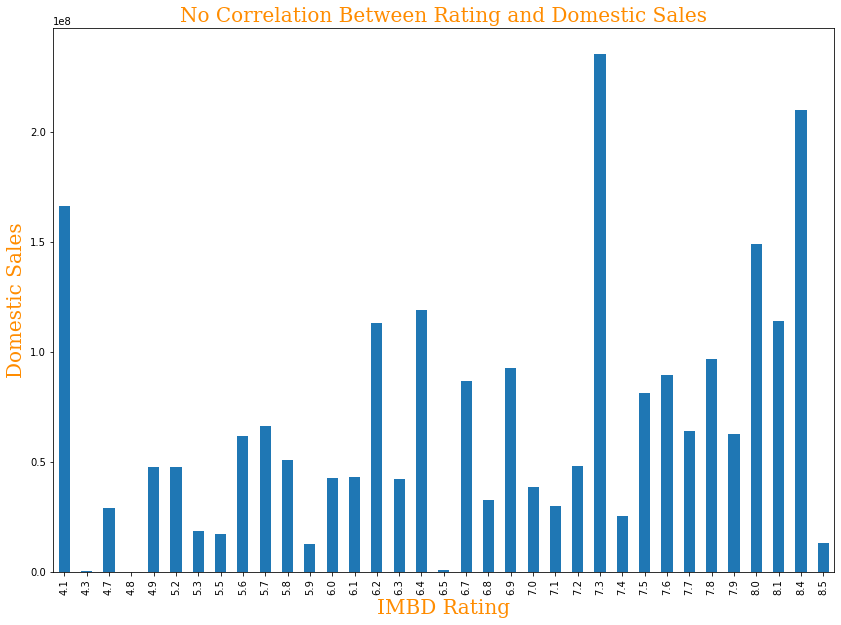

In [53]:
font = {'family': 'serif',
        'color':  'darkorange',
        'weight': 'normal',
        'size': 20,
        }
x = rating_vs_dom_sales.groupby("IMBD_Rating")['Domestic_Sales'].mean()
x.plot(kind = "bar", figsize = (14, 10))
plt.title("No Correlation Between Rating and Domestic Sales", fontdict = font)
plt.xlabel('IMBD Rating', fontdict=font)
plt.ylabel('Domestic Sales', fontdict=font)

In [54]:
dom_vs_for = pd.read_csv("sales_dom_vs_for.csv")
dom_vs_for

,GENRE,ROUND(AVG(Domestic_Sales)),ROUND(AVG(Foriegn_Sales) )
0,"Action, Adventure",173810096.0,585100032.0
1,"Action, Adventure, Biography",70896482.0,151664480.0
2,"Action, Adventure, Comedy",182854387.0,275485122.0
3,"Action, Adventure, Drama",86867337.0,191120914.0
4,"Action, Adventure, Family",55113555.0,65474762.0
...,...,...,...
114,Horror,119896835.0,133308653.0
115,"Horror, Mystery, Sci-Fi",25801570.0,12555322.0
116,"Horror, Mystery, Thriller",49723514.0,63801922.0
117,"Horror, Sci-Fi, Thriller",52248027.0,118468756.0


In [55]:
genre_dom_vs_for = pd.read_csv("dom_vs_for_by_genre.csv")  
genre_dom_vs_for

,GENRE,DOMESTIC,FOREIGN
0,ACTION,138767365,246580164
1,ADVENTURE,176609802,333646948
2,COMEDY,86565465,121224442
3,Drama,47422251,66162619
4,Horror,54507031,67245064
5,Sci-Fi,174891019,314219325
6,Romance,41252357,67120290


In [56]:
vom = genre_dom_vs_for.set_index("GENRE")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

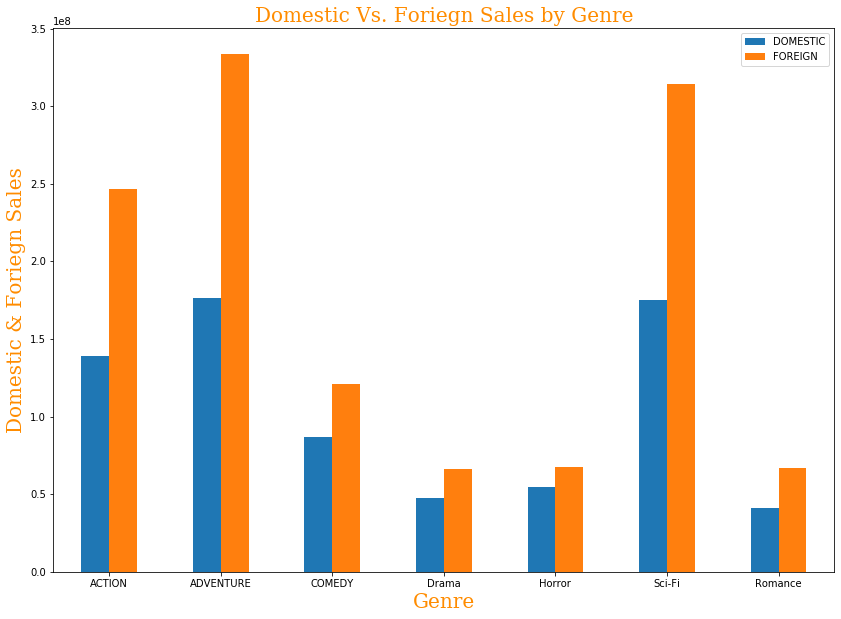

In [57]:
# tic_name = ["Action", "Adventure", "Comedy", "Drama", "Horror", "Sci-Fi", "Romance"]
font = {'family': 'serif',
        'color':  'darkorange',
        'weight': 'normal',
        'size': 20,
        }

vom.plot(kind = "bar",figsize = (14, 10))
plt.title("Domestic Vs. Foriegn Sales by Genre", fontdict = font)
plt.xlabel('Genre', fontdict=font)
plt.ylabel('Domestic & Foriegn Sales', fontdict=font)
plt.xticks(rotation = 0)